# **Buisness Intelligence J- Comp**
# *Rohan Pawar 20BAI1201* *Hardik Kathuria 20BAI1048*

# **Introduction**

#*About the Dataset*

In this project we analyze a dataset of credit card transactions made over a two-day period in September 2013 by European cardholders. The dataset contains 284,807 transactions, out of which 492 (0.17%) are fraudulent. Each transaction has 30 features, all of which are numerical. The features V1, V2, ..., V28 are the result of a PCA transformation. To protect confidentiality, background information on these features is not available. The Time feature contains the time elapsed since the first transaction, and the Amount feature contains the transaction amount. The response variable, Class, is 1 in the case of fraud, and 0 otherwise.

#*Objective*

Our goal in this project is to construct models to predict whether a credit card transaction is fraudulent. We'll attempt a supervised learning approach. We'll also create visualizations to help us understand the structure of the data and unearth any interesting patterns.


Import basic libraries:

In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline 
mpl.style.use('ggplot')
sns.set(style='whitegrid')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [ ]:
import io
transactions = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))

In [ ]:
transactions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
transactions.shape

(284807, 31)

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
transactions.isnull().any().any()

False

In [ ]:
transactions.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
transactions.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
transactions.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
140200,83594.0,-0.942842,0.542827,2.364329,0.746362,-0.156864,1.658300,1.040470,-0.172568,1.146584,-0.285245,-1.918494,-0.344654,-1.081705,-1.267090,-1.588683,-1.143017,0.331650,-0.872941,0.766566,-0.164595,-0.532846,-0.785607,-0.361710,-0.786227,0.340394,-0.510279,-0.510169,-0.434386,123.67,0
214381,139650.0,2.102054,-0.836898,-1.477722,-1.056235,-0.314357,-0.685870,-0.358110,-0.242434,-0.908294,1.001783,1.197010,0.377223,0.771878,0.097551,-0.396996,1.070390,-0.148227,-0.852196,0.692343,0.140525,0.516209,1.363633,-0.033747,0.844208,0.192659,0.005723,-0.052312,-0.058970,60.00,0
277870,167907.0,2.058609,-0.209722,-1.138300,0.412048,-0.264032,-1.138899,0.025362,-0.185463,0.861951,0.126825,-1.110725,-0.678210,-2.021387,0.693326,0.322143,-0.045146,-0.137686,-0.678892,0.115213,-0.364384,-0.312638,-0.859430,0.364158,-0.141156,-0.374553,0.212544,-0.081168,-0.065865,0.89,0
45140,42220.0,0.831349,-0.728900,-1.413328,0.446592,1.965930,3.687315,-0.142394,0.791121,0.146121,-0.122417,-0.539131,0.245339,-0.182954,0.242104,-0.123030,-0.071807,-0.504203,-0.030515,0.292155,0.416571,-0.047946,-0.598827,-0.323686,1.021351,0.811104,-0.350476,-0.016909,0.051391,232.00,0
28563,35056.0,-1.239401,1.871972,0.464516,0.836551,-0.284590,-0.324412,0.124794,0.631690,-1.001683,-0.424608,-0.354288,0.965228,1.437144,0.636760,1.061077,-0.473043,0.331997,-0.447620,0.062528,-0.228320,0.335331,0.708889,-0.042615,0.124497,-0.277603,-0.343868,-0.456218,0.029624,13.34,0


In [ ]:
transactions['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
transactions['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [ ]:
percentage=((transactions.groupby('Class')['Class'].count()/transactions['Class'].count()) *100)

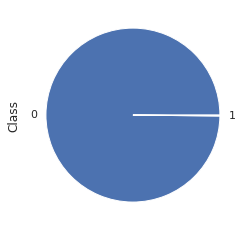

In [ ]:
percentage.plot.pie()

Only 0.17% (492 out of 284,807) transactions are fraudulent.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

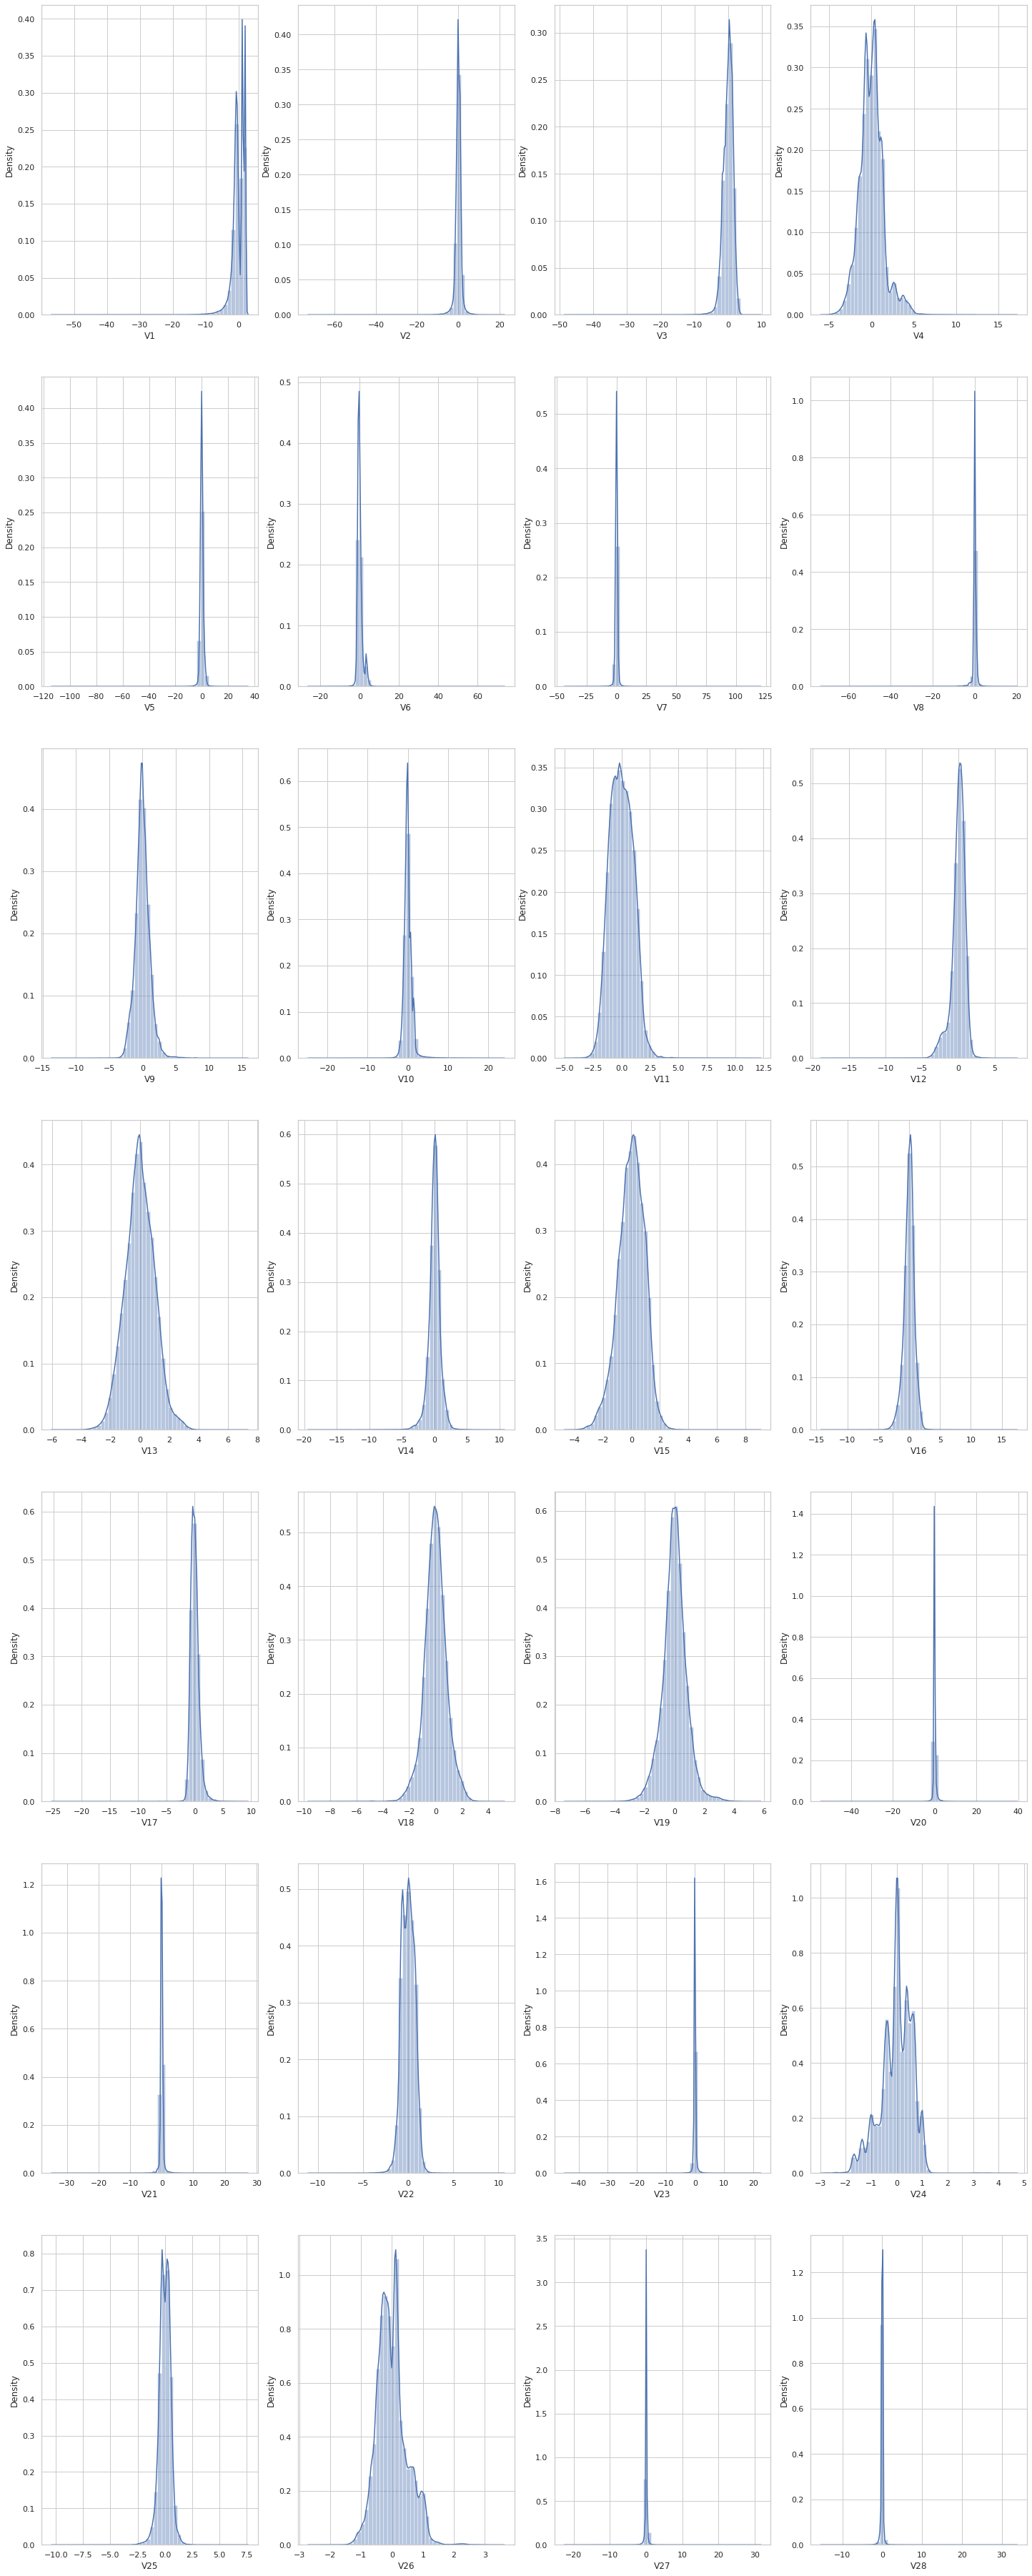

In [ ]:
df_temp = transactions.drop(columns=['Time', 'Amount', 'Class'], axis=1)

# create dist plots
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(20, 50))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
    sns.distplot(df_temp[col], ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

# **Train/Test Split**



Before we begin preprocessing, we split off a test data set. First split the data into features and response variable:

In [ ]:
X = transactions.drop(labels='Class', axis=1) # Features droping class label from data
y = transactions.loc[:,'Class']               # Response variable y that is class of fraud or nono fraud
                            # Delete the original data

We'll use a test size of 20%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)


In [ ]:
X_train.shape

(227845, 30)

In [ ]:
X_test.shape

(56962, 30)

In [ ]:
# Prevent view warnings(removing all copy info from the dataset)
X_train.is_copy = False
X_test.is_copy = False

# **Exploratory Data Analysis**
We conduct EDA only on the training set, and leave the test set unknown.

# 1.Time
Few descriptive statistics for the Time variable:

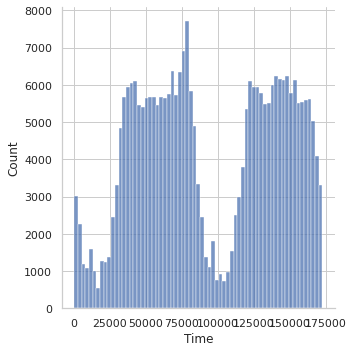

In [ ]:
sns.displot(transactions['Time'])

In [ ]:
cols = list(X.columns.values)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

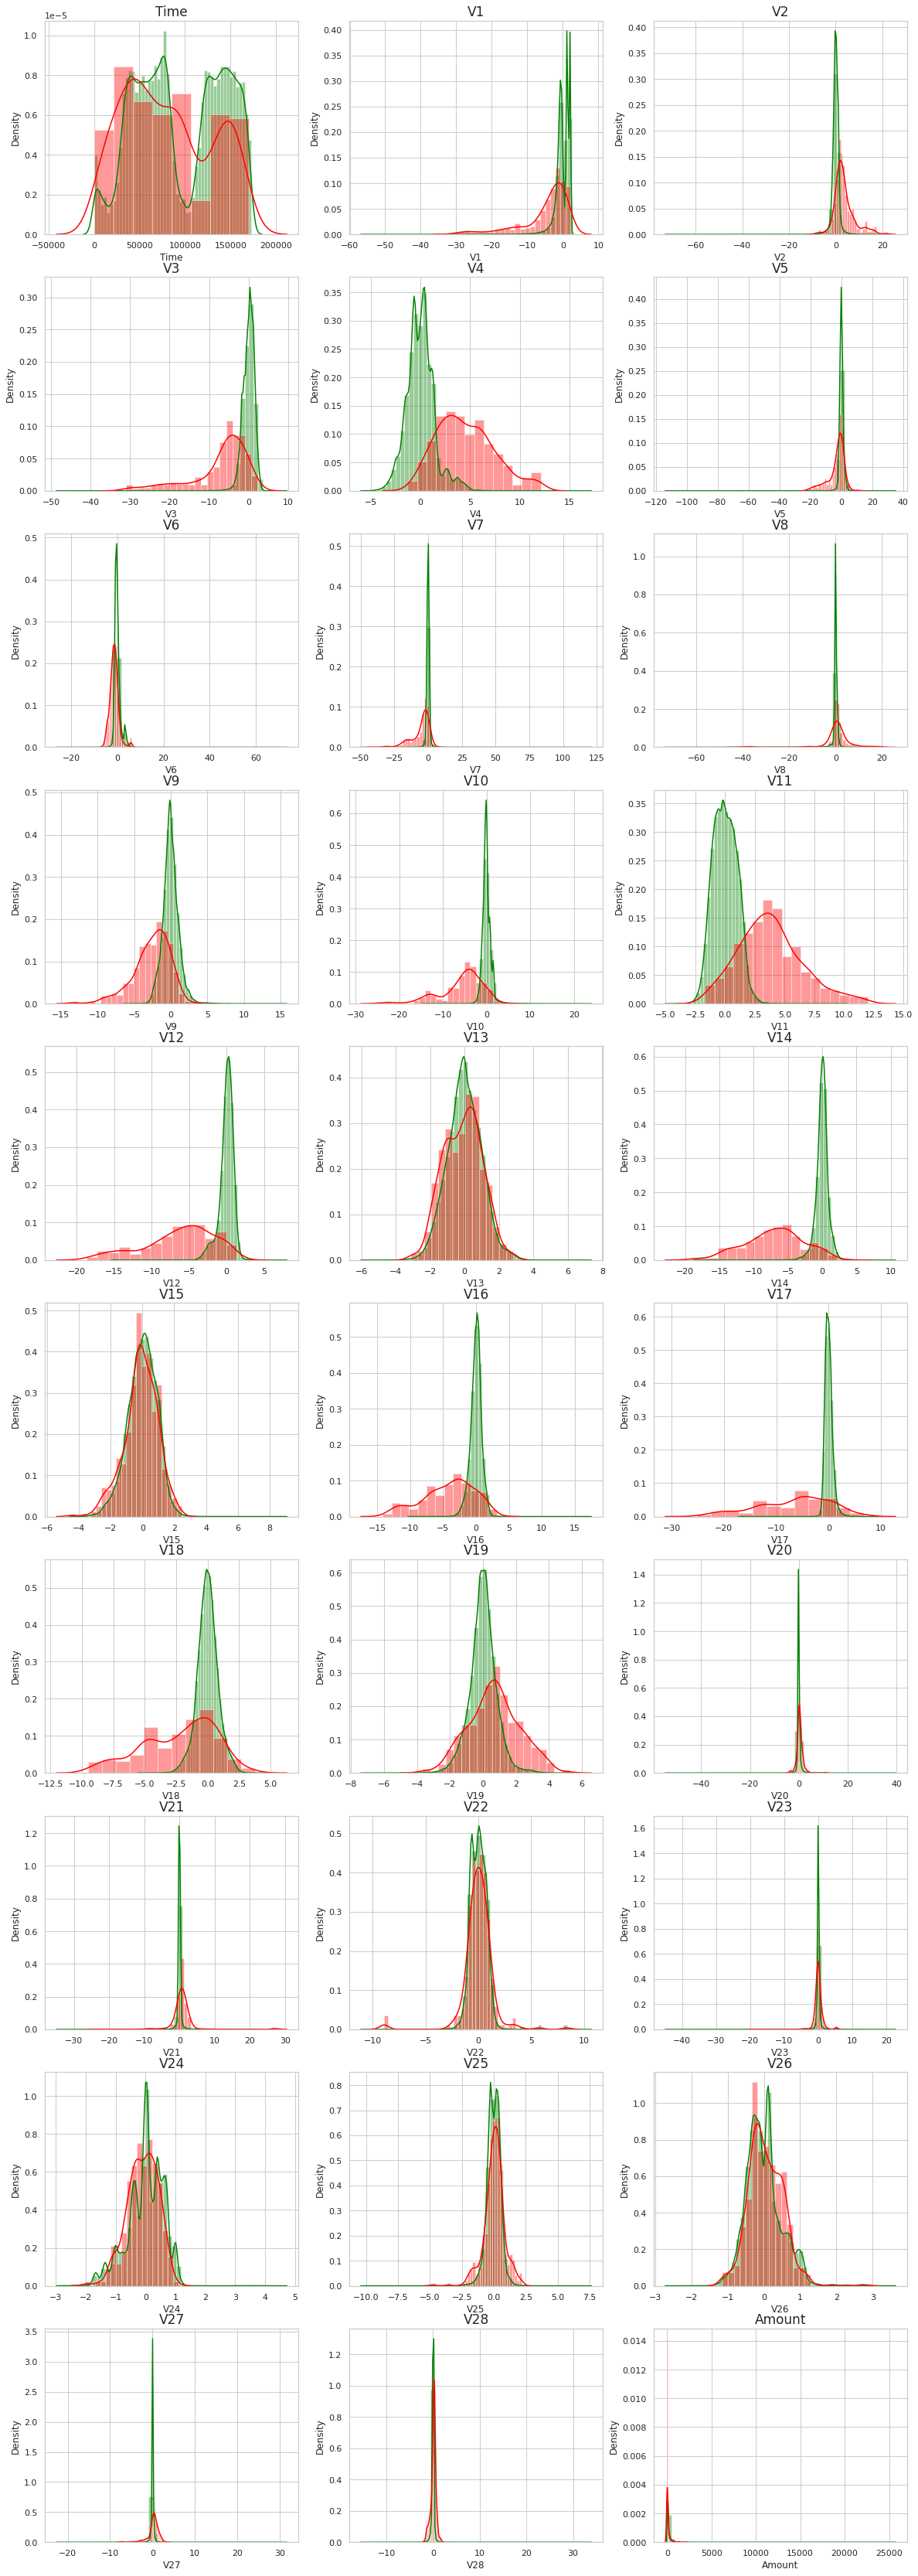

In [ ]:
normal_records = transactions.Class == 0
fraud_records = transactions.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

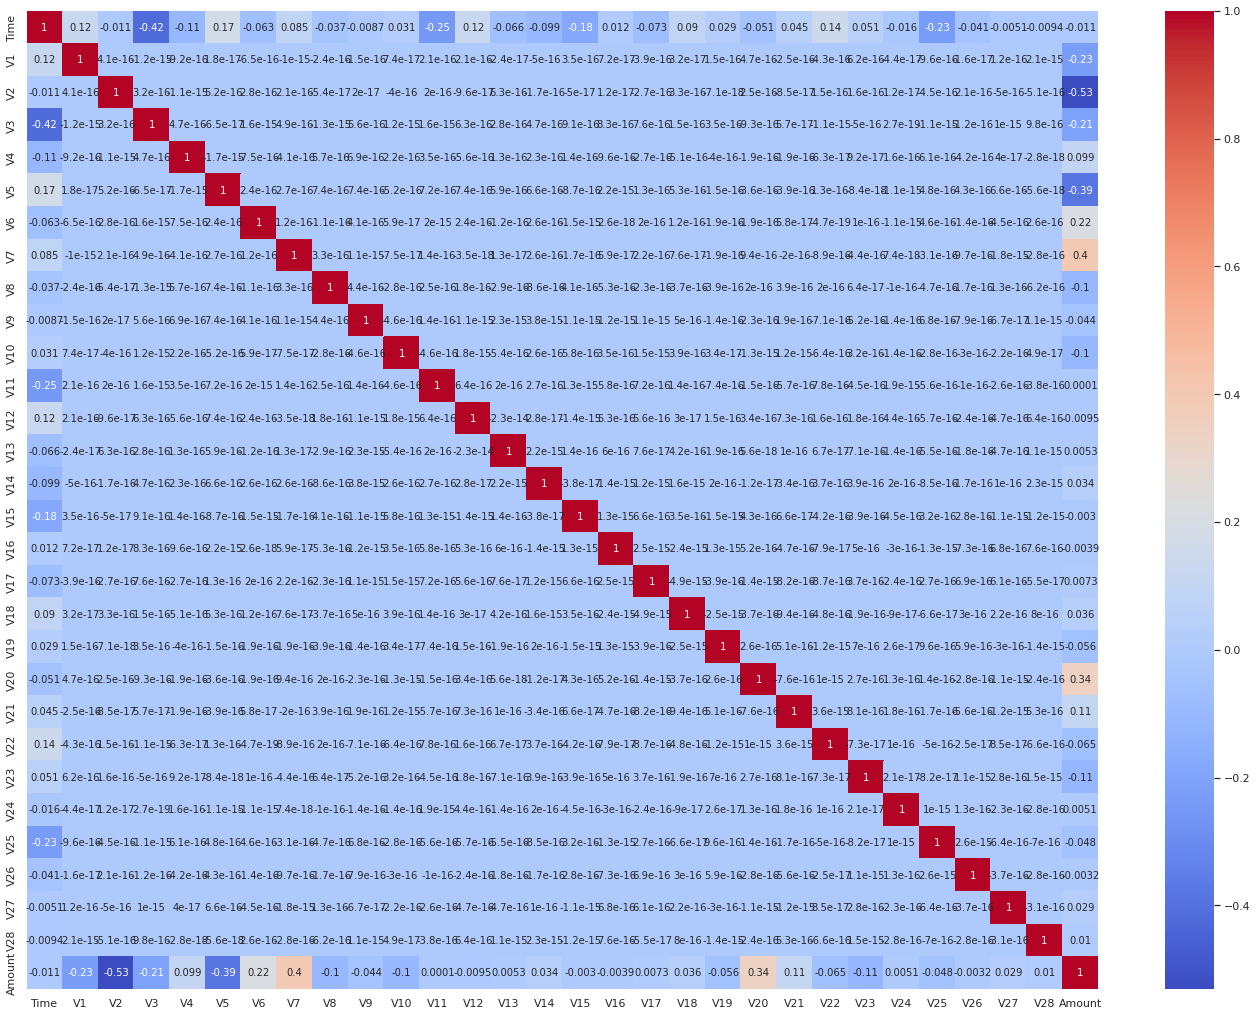

In [ ]:
##Checking the correlation in heatmap
plt.figure(figsize=(24,18))
corr=X.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

In [ ]:
  X_train['Time'].describe()

count    227845.000000
mean      94707.617670
std       47523.204111
min           0.000000
25%       54086.000000
50%       84609.000000
75%      139261.000000
max      172792.000000
Name: Time, dtype: float64

In [ ]:
print("Converting Time from Seconds to Hours.")
X_train.loc[:,'Time'] = X_train.Time / 3600
X_test.loc[:,'Time'] = X_test.Time / 3600

Let's convert the time from seconds to hours to ease the interpretation.


In [ ]:
X_train['Time'].max() / 24

1.9999074074074075

So the transactions indeed occur over a two-day period. Next let's plot a histogram of transaction times, with one bin per hour:



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Transaction Times')

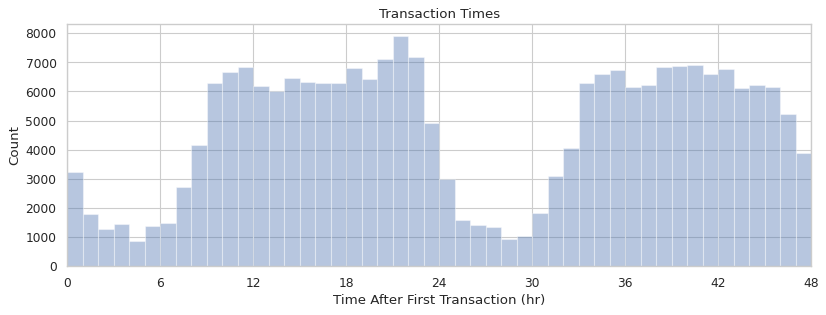

In [ ]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Time'], bins=48, kde=False)
plt.xlim([0,48])
plt.xticks(np.arange(0,54,6))
plt.xlabel('Time After First Transaction (hr)')
plt.ylabel('Count')
plt.title('Transaction Times')

**It looks like there are two **lulls in credit card transactions during nighttime on each day.**

# Amount

In [ ]:
X_train['Amount'].describe()

count    227845.000000
mean         88.709296
std         250.026305
min           0.000000
25%           5.550000
50%          22.000000
75%          77.890000
max       25691.160000
Name: Amount, dtype: float64

Comparing the different quantiles, it looks like the amounts are very right-skewed. To verify this, plot a histogram of the transaction amounts:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Transaction Amounts')

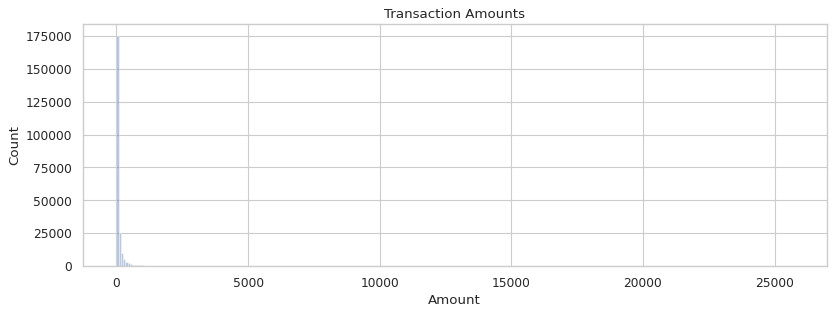

In [ ]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Amount'], bins=300, kde=False)
plt.ylabel('Count')
plt.title('Transaction Amounts')

The histogram is hard to read due to some outliers we can't see. A boxplot will show the outliers: outliers sometimes can be helpful indicators. For example, in some applications of data analytics like credit card fraud detection, outlier analysis becomes important because here, the exception rather than the rule may be of interest to the analyst.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Transaction Amounts')

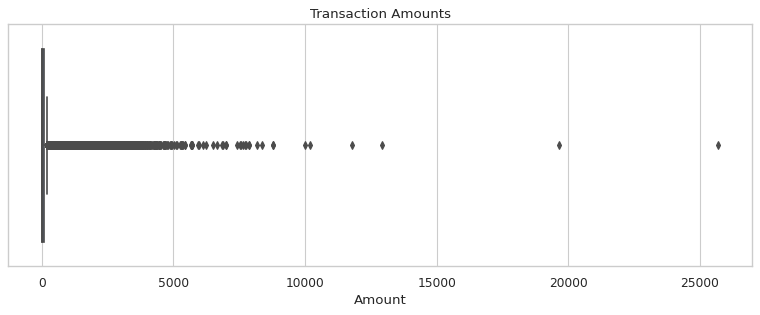

In [ ]:
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(X_train['Amount'])
plt.title('Transaction Amounts')

We can see there are no outliers on the left and many outliers on the right. So the amounts certainly seem right-skewed. We can calculate the skewness to be sure:

In [ ]:
X_train['Amount'].skew()

16.910303546516744

In [ ]:
mean=np.mean(X_train['Amount'])

In [ ]:
sd=np.std(X_train['Amount'])

In [ ]:
x = np.linspace(1,50,200)
 
#Creating a Function.
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

Text(0, 0.5, 'Probability Density')

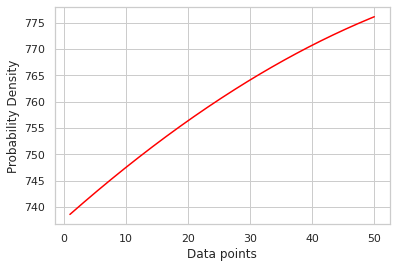

In [ ]:
pdf = normal_dist(x,mean,sd)
 
#Plotting the Results
plt.plot(x,pdf , color = 'red')
plt.xlabel('Data points')
plt.ylabel('Probability Density')

That's a strong right skew. Let's use a power transform to bring the transaction amounts closer to a normal distribution. We'll use the Box-Cox transform in SciPy, but some of the amounts are zero (min = 0 above), so we need to shift the amounts first to make them positive. We'll shift by a very small amount, just 10^(-9).

# Standard Scaling

In [ ]:


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler = sc.fit_transform(X_train)

In [ ]:
x_scaler[-1]

array([-0.57973107,  0.53491683, -1.0159783 , -0.26833026, -0.94350313,
       -0.91313873, -0.54527702, -0.23646325, -0.20367095, -2.15437114,
        1.41012598,  0.9051035 , -0.5513411 , -0.18271608,  0.3173812 ,
       -0.30708182, -0.34627449,  0.38255135,  0.19279353,  0.45418894,
        0.19821367, -0.45191226, -1.71922389, -0.1839339 , -0.08036444,
        0.46341386, -0.97744915, -0.12881622,  0.1339857 ,  0.70081061])

The transaction amounts appear to be similarly distributed throughout the daytime hours. However, in the earliest hours of the day, around 5-7 AM, amounts around 2.5 are the most common (recall this is a Box-Cox transformed value). Perhaps everyone's buying their morning coffee?

# **Mutual Information between Fraud and the Predictors**

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_infos = pd.Series(data=mutual_info_classif(X_train, y_train, discrete_features=False, random_state=1), index=X_train.columns)

The calculated mutual informations of each variable with Class, in descending order:

In [ ]:
mutual_infos.sort_values(ascending=False)

V17       0.008037
V14       0.007977
V10       0.007354
V12       0.007354
V11       0.006607
V16       0.005793
V4        0.004843
V3        0.004755
V18       0.004025
V9        0.003996
V7        0.003941
V2        0.003085
V21       0.002304
V27       0.002271
V6        0.002265
V5        0.002254
V1        0.001990
V8        0.001843
V28       0.001757
Time      0.001722
Amount    0.001388
V19       0.001322
V20       0.001136
V23       0.000827
V24       0.000593
V26       0.000459
V22       0.000388
V25       0.000376
V15       0.000230
V13       0.000205
dtype: float64

The five most correlated variables with Class are, in decreasing order, V17, V14, V10, V12, and V11

# **Modeling**


> Now we're ready to build machine learning models to predict whether a transaction is fraudulent. We'll train the following models:
*   Logistic regression
*   Support vector classifier
*   Random forest

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler = sc.fit_transform(X)

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.25, random_state=1, stratify=y)

# Logistic Regression and Support Vector Classifier

> The class SGDClassifier implements multiple linear classifiers with SGD training, which makes learning much faster on large datasets. We'll implement the model as a machine learning pipeline that includes StandardScaler for data standardization (rescaling each variable to zero mean and unit variance).



In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.91      0.71      0.79       123

    accuracy                           1.00     71202
   macro avg       0.95      0.85      0.90     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score: 0.7945205479452054


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.96      0.87      0.91       123

    accuracy                           1.00     71202
   macro avg       0.98      0.93      0.96     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score: 0.9106382978723403


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred=dt.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))
print("Accuracy score is " + str(accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.71      0.85      0.77       123

    accuracy                           1.00     71202
   macro avg       0.85      0.92      0.88     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score: 0.7703703703703704
Accuracy score is 0.9991292379427544


## **KNN**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=0)
from sklearn.preprocessing import StandardScaler 
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric = "minkowski", p=2)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm= confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy score is " + str(accuracy_score(y_test, y_pred)))

[[71073     9]
 [   28    92]]
Accuracy score is 0.9994803516755147


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [ ]:

cm= confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy score is " + str(accuracy_score(y_test, y_pred)))


[[69566  1516]
 [   20   100]]
Accuracy score is 0.9784275722592062


# Class Inbalencement

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


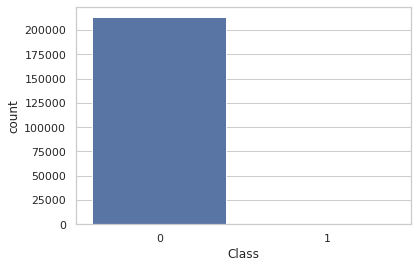

In [ ]:
sns.countplot(y_train)

In [ ]:
y_train.size

213605

In [ ]:
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
x_smote, y_smote = over_sample.fit_resample(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


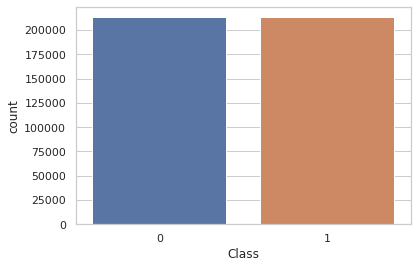

In [ ]:
sns.countplot(y_smote)

In [ ]:
x_smote.size
#y_smote.size

12793980

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71082
           1       0.06      0.92      0.12       120

    accuracy                           0.98     71202
   macro avg       0.53      0.95      0.55     71202
weighted avg       1.00      0.98      0.99     71202

F1 Score: 0.11689691817215728


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.88      0.83      0.85       120

    accuracy                           1.00     71202
   macro avg       0.94      0.92      0.93     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score: 0.8547008547008548


In [ ]:
# from sklearn.tree import DecisionTreeRegressor
dt1=DecisionTreeRegressor()
dt1.fit(x_smote, y_smote)
y_pred=dt1.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.41      0.79      0.54       120

    accuracy                           1.00     71202
   macro avg       0.70      0.89      0.77     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score: 0.5397727272727273


# **Conclusion**


> We were able to accurately identify fraudulent credit card transactions using a random forest model. We found that the five variables most correlated with fraud are, in decreasing order, V17, V14, V10, V12, and V11. Only a few preprocessing steps were necessary before constructing predictive models:

*   Split the data using a random, stratified train/test split with a test size of 20%
*   Box-Cox power transform of the transaction amounts to remove skewness in the data
*   Mean and variance standardization of all features as part of a machine learning pipeline

We used the Matthews correlation coefficient (MCC) to compare the performance of different models. In cross validation, the best linear model (logistic regression, linear SVC) achieved a cross-validated MCC score of 0.807, and a random forest achieved a cross-validated MCC score of 0.856. We therefore chose the random forest as the better model, which obtained an MCC of 0.869 on the test set.

To improve a chosen model, we searched over a grid of hyperparameters and compared performance with cross-validation. It may be possible to improve the random forest model by further tweaking the hyperparameters, given additional time and/or computational power.
